In [6]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('results/gridsearch.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      162 non-null    float64
 1   std_fit_time       162 non-null    float64
 2   mean_score_time    162 non-null    float64
 3   std_score_time     162 non-null    float64
 4   param_C            162 non-null    float64
 5   param_cache_size   162 non-null    int64  
 6   param_gamma        162 non-null    object 
 7   param_kernel       162 non-null    object 
 8   params             162 non-null    object 
 9   split0_test_score  162 non-null    float64
 10  split1_test_score  162 non-null    float64
 11  split2_test_score  162 non-null    float64
 12  split3_test_score  162 non-null    float64
 13  split4_test_score  162 non-null    float64
 14  mean_test_score    162 non-null    float64
 15  std_test_score     162 non-null    float64
 16  rank_test_score    162 non

/Users/elliotheisler/anaconda3/envs/cmpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elliotheisler/anaconda3/envs/cmpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elliotheisler/anaconda3/envs/cmpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='param_kernel', ylabel='mean_test_score'>

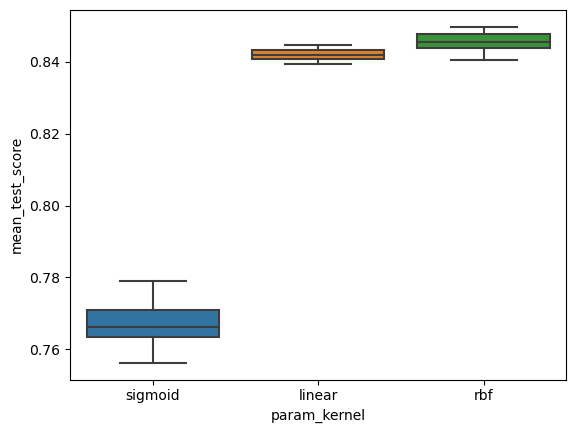

In [11]:
df.astype({'param_selection': 'string', 'param_kernel': 'string', 'param_gamma': 'string'})
df = df.sort_values(by='mean_test_score')
param_columns=['param_C', 'param_gamma', 'param_kernel', 'param_selection', 'param_k', 'mean_test_score']
sns.boxplot(data=df,
            y='mean_test_score',
            x='param_kernel'
            )

/Users/elliotheisler/anaconda3/envs/cmpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elliotheisler/anaconda3/envs/cmpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elliotheisler/anaconda3/envs/cmpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elliotheisler/anaconda3/envs/cmpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

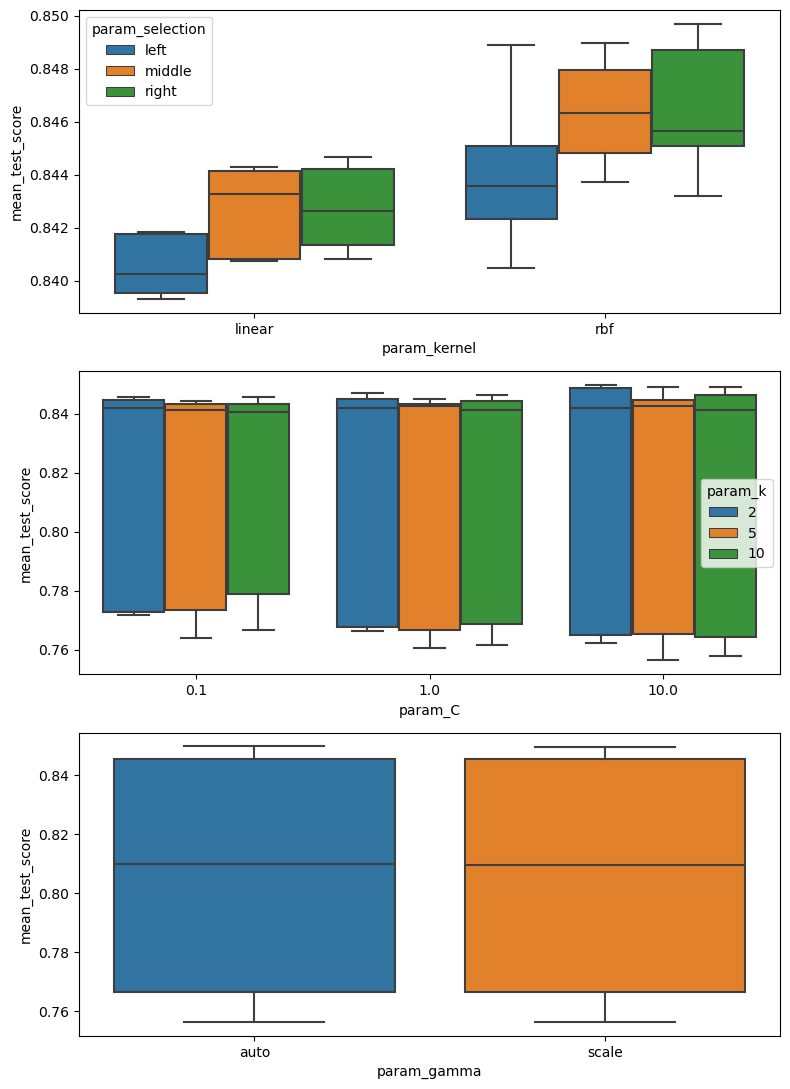

In [44]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(8,11))
sns.boxplot(data=df[ df['param_kernel'] != 'sigmoid'],
            y='mean_test_score',
            x='param_kernel',
            hue='param_selection',
            ax=axs[0]
            )
sns.boxplot(data=df,
            y='mean_test_score',
            hue='param_k',
            x='param_C',
            ax=axs[1],
            )
sns.boxplot(data=df[df['param_kernel'].map(lambda k: k == 'rbf' or k == 'sigmoid')],
            y='mean_test_score',
            x='param_gamma',
            ax=axs[2],
            )
fig.tight_layout()
plt.savefig('results/additional_results.png')

### best result

In [24]:
df = df.sort_values(by='mean_test_score')
# best results
df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_cache_size,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_selection,param_k
35,1.141606,0.031102,0.037672,0.002649,10.0,1000,auto,sigmoid,"{'C': 10, 'cache_size': 1000, 'gamma': 'auto',...",0.744857,0.754962,0.770758,0.763177,0.747653,0.756282,0.009631,18,left,5
